# Core Imports and Setup

In [1]:
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("openff.toolkit").setLevel(logging.ERROR)

from openff import toolkit, evaluator

from openff.units import unit

# 0) Registering Custom ThermoML Properties

In [2]:
from openff.evaluator import properties
from openff.evaluator.datasets.thermoml import thermoml_property
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase

@thermoml_property("Osmotic coefficient", supported_phases=PropertyPhase.Liquid)
class OsmoticCoefficient(PhysicalProperty):
    """A class representation of a osmotic coeff property"""

    @classmethod
    def default_unit(cls):
        return unit.dimensionless
    
...

custom_thermoml_props = [
    OsmoticCoefficient,
]

for custom_prop_cls in custom_thermoml_props:    
    setattr(properties, custom_prop_cls.__name__, custom_prop_cls)

# 1) - Loading ThermoML Data Sets

## Extracting data from ThermoML

In [3]:
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase, PhysicalPropertyDataSet
from openff.evaluator.datasets.thermoml import thermoml_property, ThermoMLDataSet

data_set_initial = PhysicalPropertyDataSet.from_json("freesolv.json")
data_set_initial.to_pandas()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [4]:
print(len(data_set_initial))
print(data_set_initial.property_types)
print(data_set_initial.substances)

642
{'SolvationFreeEnergy'}
{<Substance C1CCOCC1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Cc1cc2ccccc2cc1C{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Nc1cccc([N+](=O)[O-])c1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCOC(=O)CC{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(=O)OCC(C)C{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC[C@H](C)c1ccccc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CN1CCNCC1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCNc1nc(NC(C)C)nc(SC)n1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance COC(OC)(OC)c1ccccc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance O=c1cc(Cl)[nH]c(=O)[nH]1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Cc1c[nH]c2ccccc12{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Cc1ccnc(C)c1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(C)C(C)C(C)C{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(C)CBr{sol}{n=1}|O{solv}{x=1.000000}>, <Substance ClCCBr{sol}{n=1}|O{solv}{x=1.000000}>, <Substance O{sol

## Filtering data set

In [5]:
from openff.evaluator.datasets.curation.components.filtering import FilterByPropertyTypes, FilterByPropertyTypesSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByTemperature, FilterByTemperatureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByPressure, FilterByPressureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterBySmiles, FilterBySmilesSchema

data_set_sfes= FilterByPropertyTypes.apply(
    data_set_initial, FilterByPropertyTypesSchema(property_types=["SolvationFreeEnergy"]))

print(len(data_set_sfes))

642


### Inspecting and saving new properties

In [6]:
# save for future use
data_set_path = Path('filtered_dataset_sfes.json')
data_set_sfes.json(data_set_path, format=True)

# inspect new properties
sfes_df = data_set_sfes.to_pandas()


In [7]:
sfes_df

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


## Getting smiles

In [8]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog
from openff.evaluator.substances import Component, Substance

In [9]:
subs=list(set(data_set_sfes.substances))
smiles_list=[]

for i in subs:
    comps=[]
    comps.append(i.components[0].smiles)
    comps.append(i.components[1].smiles)
    for o in comps:
        comps.remove('O')
        [smiles_list.append(y) for y in comps]

mols_list=[]

for s in smiles_list:
    m=Chem.MolFromSmiles(s)
    mols_list.append(m)

In [12]:
funcs=[]
fc = FilterCatalog.GetFunctionalGroupHierarchy()
for i in range(len(mols_list)):
    whtv=mols_list[i]
    for match in fc.GetMatches(whtv):
        ffg=match.GetDescription()
        funcs.append(ffg)
        print(i,ffg)

2 Amine
2 Nitro
3 Alcohol
7 Amine
8 Amine
10 Halogen
14 Halogen
15 Halogen
20 Aldehyde
23 Amine
26 Alcohol
28 Alcohol
30 Alcohol
31 Halogen
35 Alcohol
36 Aldehyde
37 Nitro
40 Amine
42 Halogen
43 Halogen
45 Aldehyde
48 Amine
48 Nitro
49 Alcohol
51 Amine
51 Halogen
52 Aldehyde
53 Halogen
55 Alcohol
56 Amine
58 Alcohol
59 Nitro
61 SulfonylChloride
62 CarboxylicAcid
64 Halogen
65 Alcohol
67 Halogen
68 CarboxylicAcid
68 Halogen
69 Halogen
70 Alcohol
71 Alcohol
74 Amine
75 TerminalAlkyne
79 Halogen
80 Aldehyde
87 Alcohol
88 Halogen
91 Halogen
95 Alcohol
96 Amine
98 Amine
98 Halogen
99 Amine
100 Alcohol
101 Halogen
102 Halogen
104 Halogen
106 Amine
108 Halogen
109 Amine
112 Alcohol
113 Halogen
114 Alcohol
114 Halogen
115 Nitro
117 Nitro
119 Halogen
121 Aldehyde
123 Halogen
123 Nitro
124 Halogen
126 CarboxylicAcid
129 Halogen
130 Halogen
132 Amine
132 Nitro
133 Aldehyde
135 Alcohol
135 Aldehyde
135 Halogen
138 Alcohol
139 Amine
140 Halogen
144 Halogen
147 Nitro
148 Alcohol
149 Halogen
150 Halo

In [13]:
set(funcs)

{'Alcohol',
 'Aldehyde',
 'Amine',
 'CarboxylicAcid',
 'Halogen',
 'Nitro',
 'SulfonylChloride',
 'TerminalAlkyne'}

In [14]:
def get_func_smiles(initial_data_set):
    subs=list(set(initial_data_set.substances))
    smiles_list=[]

    for i in subs:
        comps=[]
        comps.append(i.components[0].smiles)
        comps.append(i.components[1].smiles)
        for o in comps:
            comps.remove('O')
            [smiles_list.append(y) for y in comps]


    mols_list=[]

    for s in smiles_list:
        m=Chem.MolFromSmiles(s)
        mols_list.append(m)

    all=[]
    alcohols=[]
    aldehydes=[]
    amines=[]
    carboxylics=[]
    halogens=[]
    nitros=[]
    sulf_chlorides=[]
    terminal_alkynes=[]
    other=[]
    both=[]
    
    fc = FilterCatalog.GetFunctionalGroupHierarchy()
    for i in range(len(mols_list)):
        whtv=mols_list[i]
        if not fc.GetMatches(whtv):
            other.append(i)
        else:
            for match in fc.GetMatches(whtv):
                ffg=match.GetDescription()
                all.append(i)
                # print(i,ffg)
                if ffg == 'Amine':
                    amines.append(i)
                elif ffg == 'Alcohol':
                    alcohols.append(i)
                elif ffg == 'Aldehyde':
                    aldehydes.append(i)
                elif ffg == 'CarboxylicAcid':
                    carboxylics.append(i)
                elif ffg == 'Halogen':
                    halogens.append(i)
                elif ffg == 'Nitro':
                    nitros.append(i) 
                elif ffg == 'SulfonylChloride':
                    sulf_chlorides.append(i)
                elif ffg == 'TerminalAlkyne':
                    terminal_alkynes.append(i)       
                if i in amines and i in alcohols:
                    both.append(i)
                    amines.remove(i)
                    alcohols.remove(i)
    

    def get_smiles(func_type):
        smiles=[]

        for x in func_type:
            comp0=subs[x].components[0].smiles
            comp1=subs[x].components[1].smiles
            if comp0 != 'O':
                smiles.append(comp0)
            if comp1 != 'O':
                smiles.append(comp1)
            # smiles.append(comp0) 
            # smiles.append(comp1)
        smiles.append('O')
        return smiles

    smiles_results={}

    smiles_results['all']=get_smiles(all)
    smiles_results['alcohols']=get_smiles(alcohols)
    smiles_results['aldehydes']=get_smiles(aldehydes)
    smiles_results['carboxylics']=get_smiles(carboxylics)
    smiles_results['halogens']=get_smiles(halogens)
    smiles_results['amines']=get_smiles(amines)
    smiles_results['nitros']=get_smiles(nitros)
    smiles_results['sulf_chlorides']=get_smiles(sulf_chlorides)
    smiles_results['terminal_alkynes']=get_smiles(terminal_alkynes)
    smiles_results['both']=get_smiles(both)
    smiles_results['other']=get_smiles(other)

    return smiles_results

    

In [15]:
smiles_results=get_func_smiles(data_set_sfes)

In [23]:
other_smiles_obj=[Chem.MolFromSmiles(x) for x in smiles_results['other']]

In [26]:
import pandas as pd

In [34]:
other_df=pd.DataFrame(smiles_results['other'],columns=['Smiles_Others'])

In [35]:
other_df

,Smiles_Others
0,C1CCOCC1
1,Cc1cc2ccccc2cc1C
2,CCOC(=O)CC
3,CC(=O)OCC(C)C
4,CC[C@H](C)c1ccccc1
...,...
314,C=CCC=C
315,CC[C@@H](C)C(C)C
316,CCCCCCCC
317,S


In [36]:
other_df['mol']=other_df['Smiles_Others'].apply(lambda y: Chem.MolFromSmiles(y))

In [37]:
other_df['mol'].isnull().sum()

0

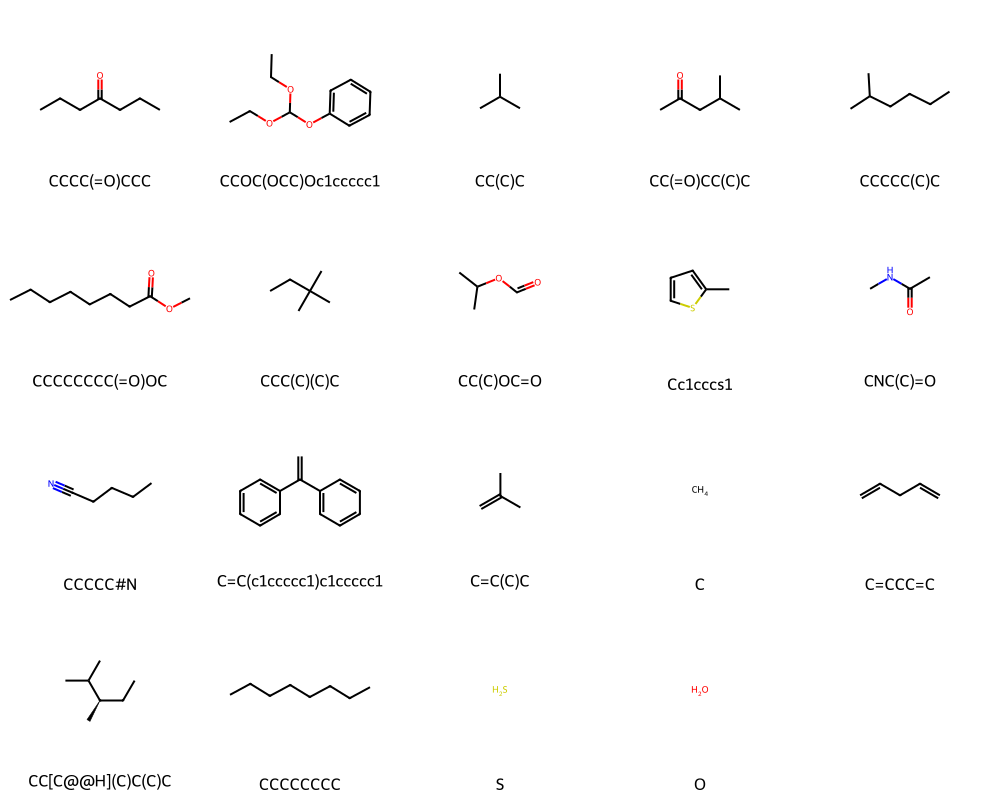

In [49]:
mol=other_df['mol'][300:350]
Draw.MolsToGridImage(mol, molsPerRow=5, useSVG=True, legends=list(other_df['Smiles_Others'][300:350].values))

In [ ]:
mol=other_df['mol'][:20]
Draw.MolsToGridImage(mol, molsPerRow=5, useSVG=True, legends=list(other_df['Smiles_Others'][:20].values))

In [21]:
smiles_results['other']

['C1CCOCC1',
 'Cc1cc2ccccc2cc1C',
 'CCOC(=O)CC',
 'CC(=O)OCC(C)C',
 'CC[C@H](C)c1ccccc1',
 'COC(OC)(OC)c1ccccc1',
 'Cc1c[nH]c2ccccc12',
 'Cc1ccnc(C)c1',
 'CC(C)C(C)C(C)C',
 'c1cc2c3c(cccc3c1)CC2',
 'C=C(C)c1ccccc1',
 'CC',
 'ClC(Cl)=C(Cl)Cl',
 'Cc1ccc2cc(C)ccc2c1',
 'CCCCC(=O)OC',
 'CC(F)F',
 'CCCOC(C)=O',
 'CCOC=O',
 'Cc1ccc(C)nc1',
 'CC(C)OC(C)C',
 'CCCCCCCCC',
 'CCCOC(=O)CCC',
 'O=C1NC(=O)c2ccccc21',
 'Cc1cccc(C)c1',
 'CCOC(=O)c1ccccc1',
 'N',
 'Cc1cncc(C)c1',
 'CS(C)(=O)=O',
 'ClC(Cl)Cl',
 'CC(C)C(=O)C(C)C',
 'CC(=O)OCC(COC(C)=O)OC(C)=O',
 'COC=O',
 'CC(=O)C1CCCCC1',
 'CC1CCCCC1',
 'COC(OC)(OC)C(F)(F)F',
 'CC(=O)c1cccnc1',
 'ICI',
 'CC(C)C(C)C',
 'c1ccc2ncccc2c1',
 'CCCOC',
 'CN(C)C(=O)c1ccccc1',
 'CC(C)CCC(C)(C)C',
 'Cc1ccncc1C',
 'CCCCN(CC)C(=O)SCCC',
 'CSSC',
 'COCCOC',
 'CC(C)Cc1ccccc1',
 'CCCCCOC(C)=O',
 'CC(=O)c1ccncc1',
 'CCC(N)=O',
 'CC(C)CCOC=O',
 'CCC(=O)OC',
 'FC(F)(F)F',
 'CCCCCC1CCCC1',
 'C=CC(=C)C',
 'CCCCCc1ccccc1',
 'C=CCCCCCC',
 'CCc1ccc(C)cc1',
 'CC(=O)C1CC1',
 'C

## Get figures of functional groups

In [18]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, MolFromSmiles
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage
import pubchempy
from PIL import Image, ImageDraw, ImageFont
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs

In [19]:
def get_figures(func_group):
    func_group_mols=[]
    matchlegend=[]
    for m in set(smiles_results[func_group]):
        if m != 'O':
            compounds=pubchempy.get_compounds(m, namespace='smiles')
            match = compounds[0]
            match_name=str(match.iupac_name)
            matchlegend.append(match_name)
            mol=Chem.MolFromSmiles(m)
            func_group_mols.append(mol)
    init_fig=MolsToGridImage(mols=func_group_mols, legends=matchlegend, molsPerRow=8, returnPNG=False)
    init_fig.save('%s_smiles.png'%func_group)
    ffig=Image.open('%s_smiles.png'%func_group)
    efig=ImageDraw.Draw(ffig)
    tfont=ImageFont.truetype("aileron_font/Aileron-Bold.otf", size=30)
    efig.text(xy=(10,8),text="%s"%func_group.upper(), font=tfont, align='center', fill=(255,0,0))
    ffig.save('%s_smiles.png'%func_group)
    return ffig

In [17]:
get_figures('alcohols')

KeyboardInterrupt: 

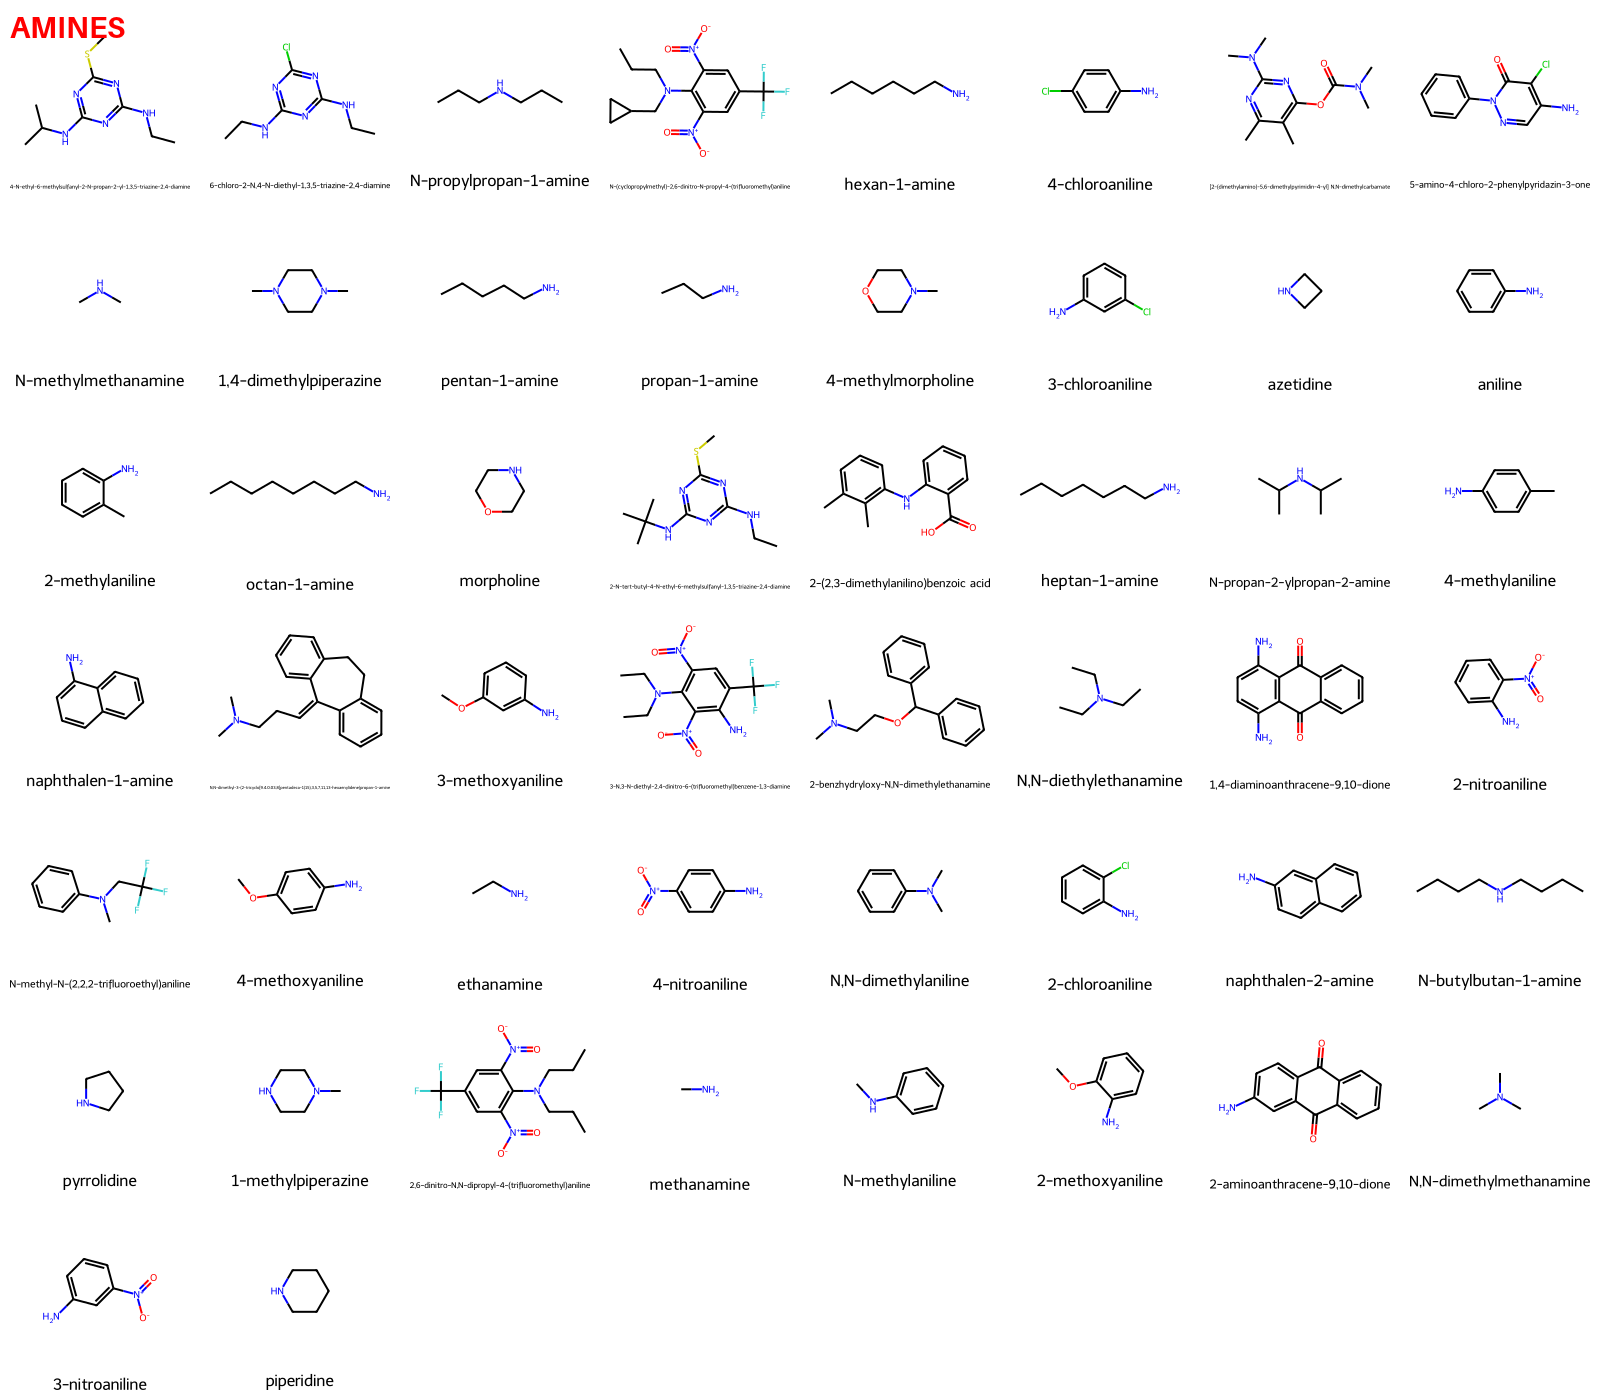

In [ ]:
get_figures('amines')

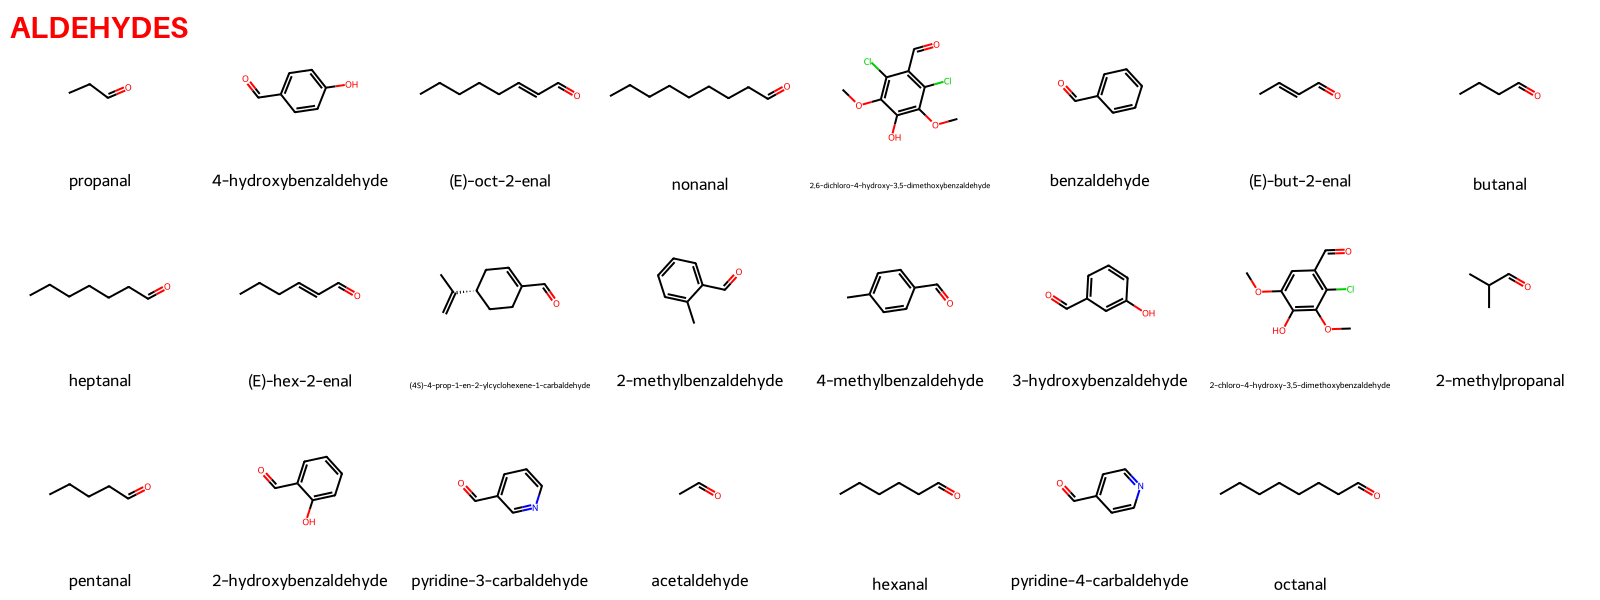

In [ ]:
get_figures('aldehydes')

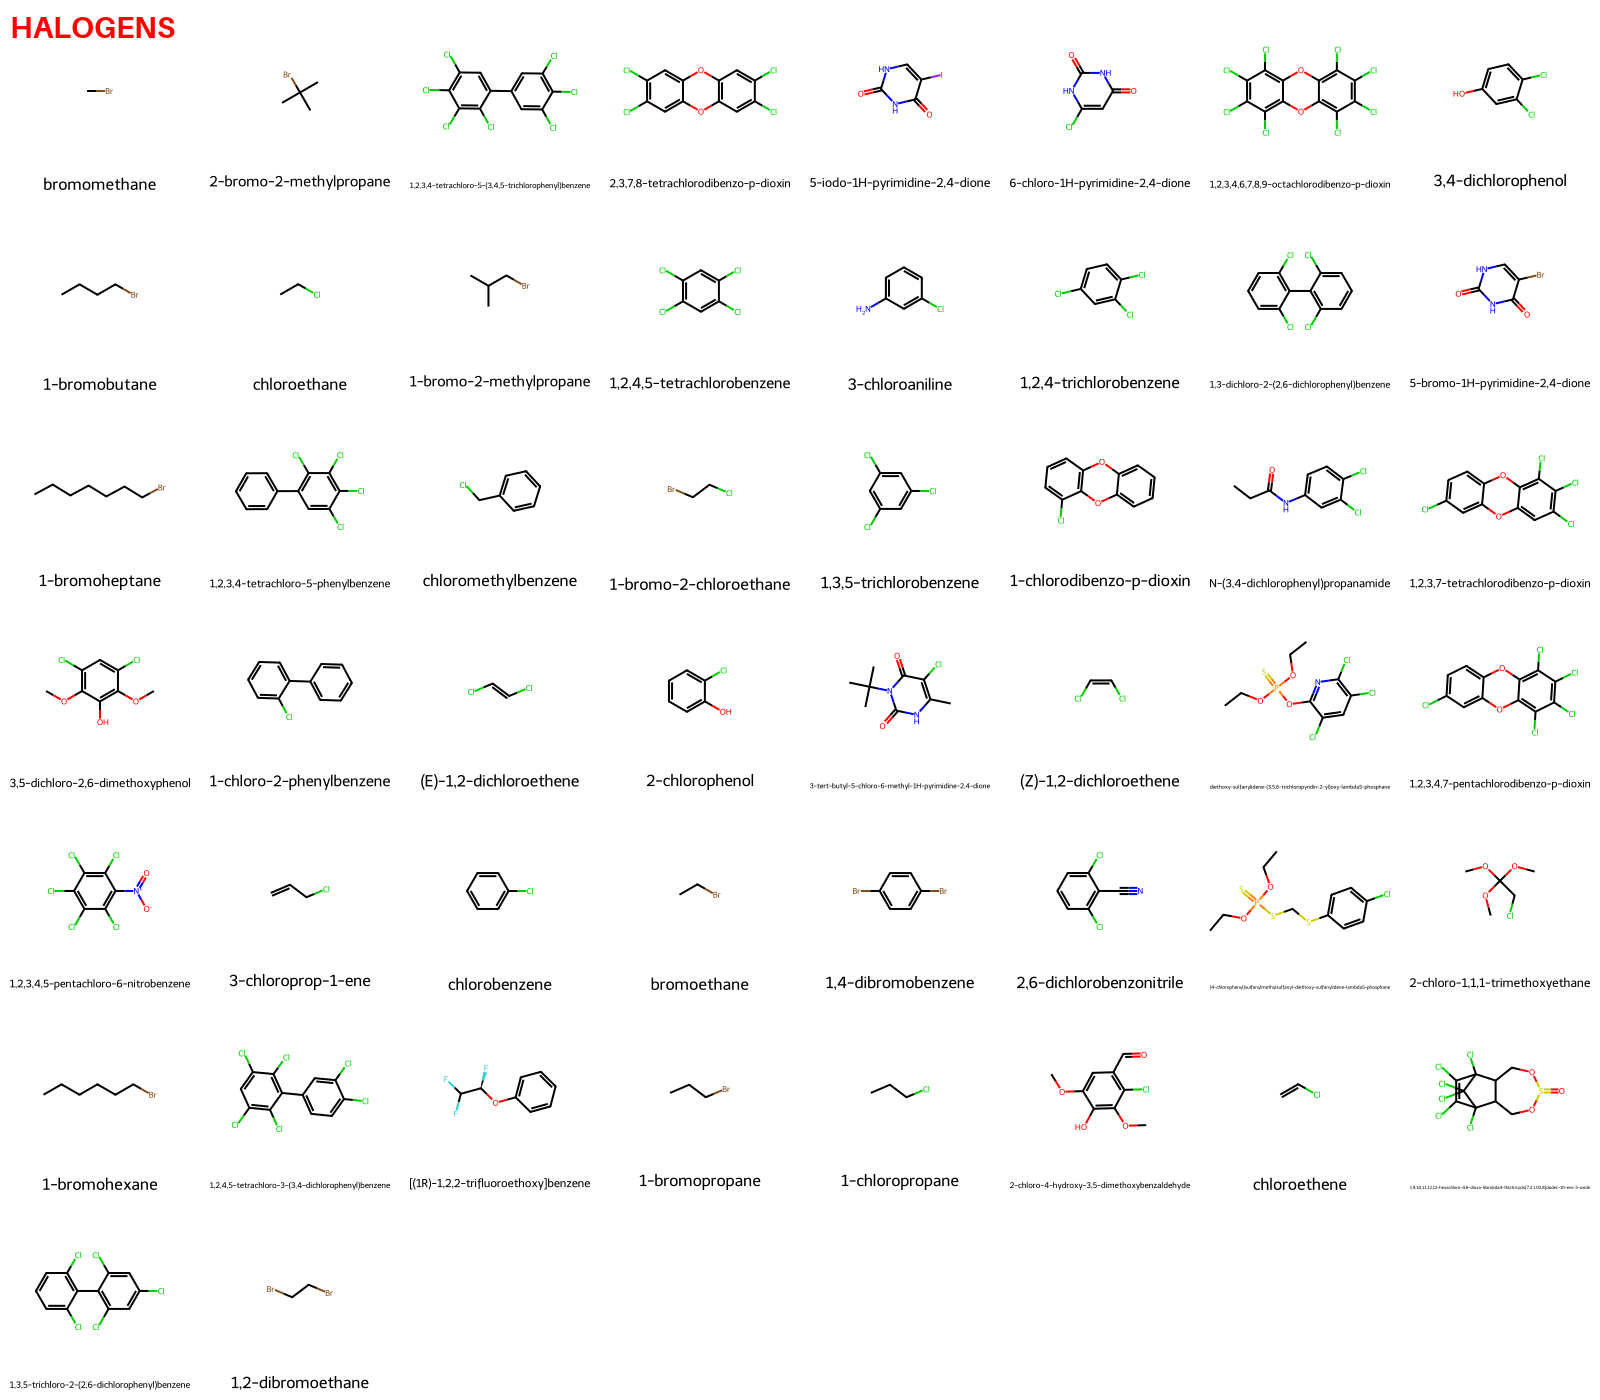

In [ ]:
get_figures('halogens')

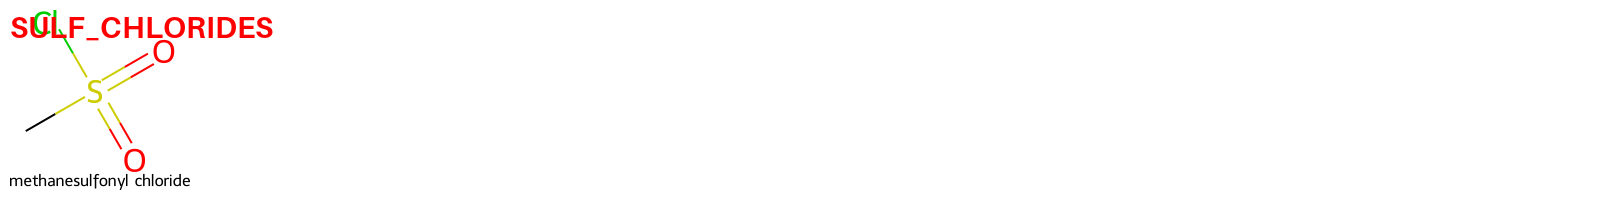

In [ ]:
get_figures('sulf_chlorides')

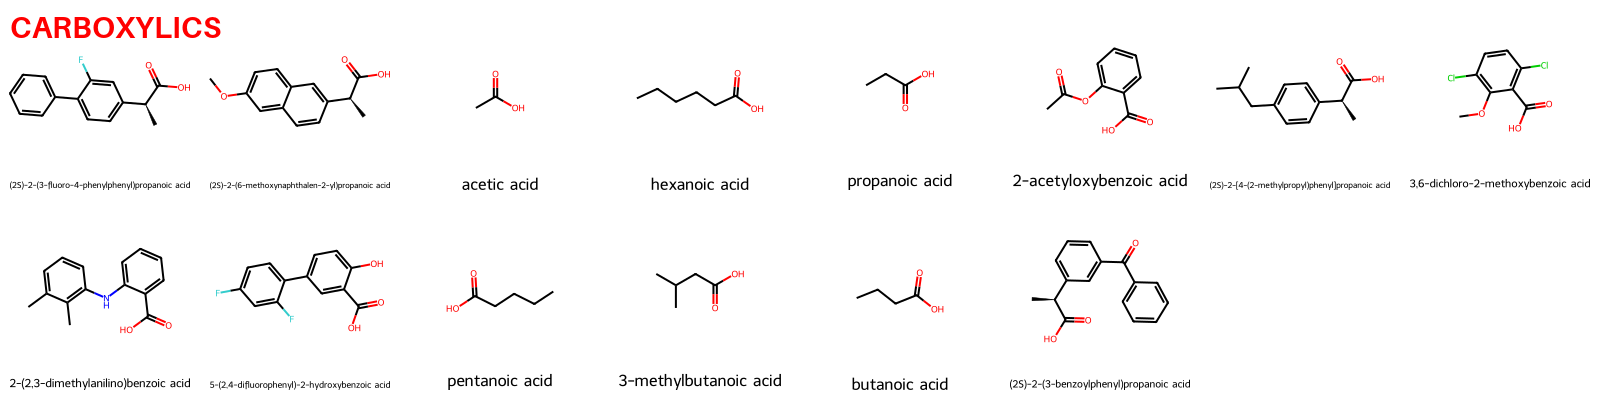

In [ ]:
get_figures('carboxylics')

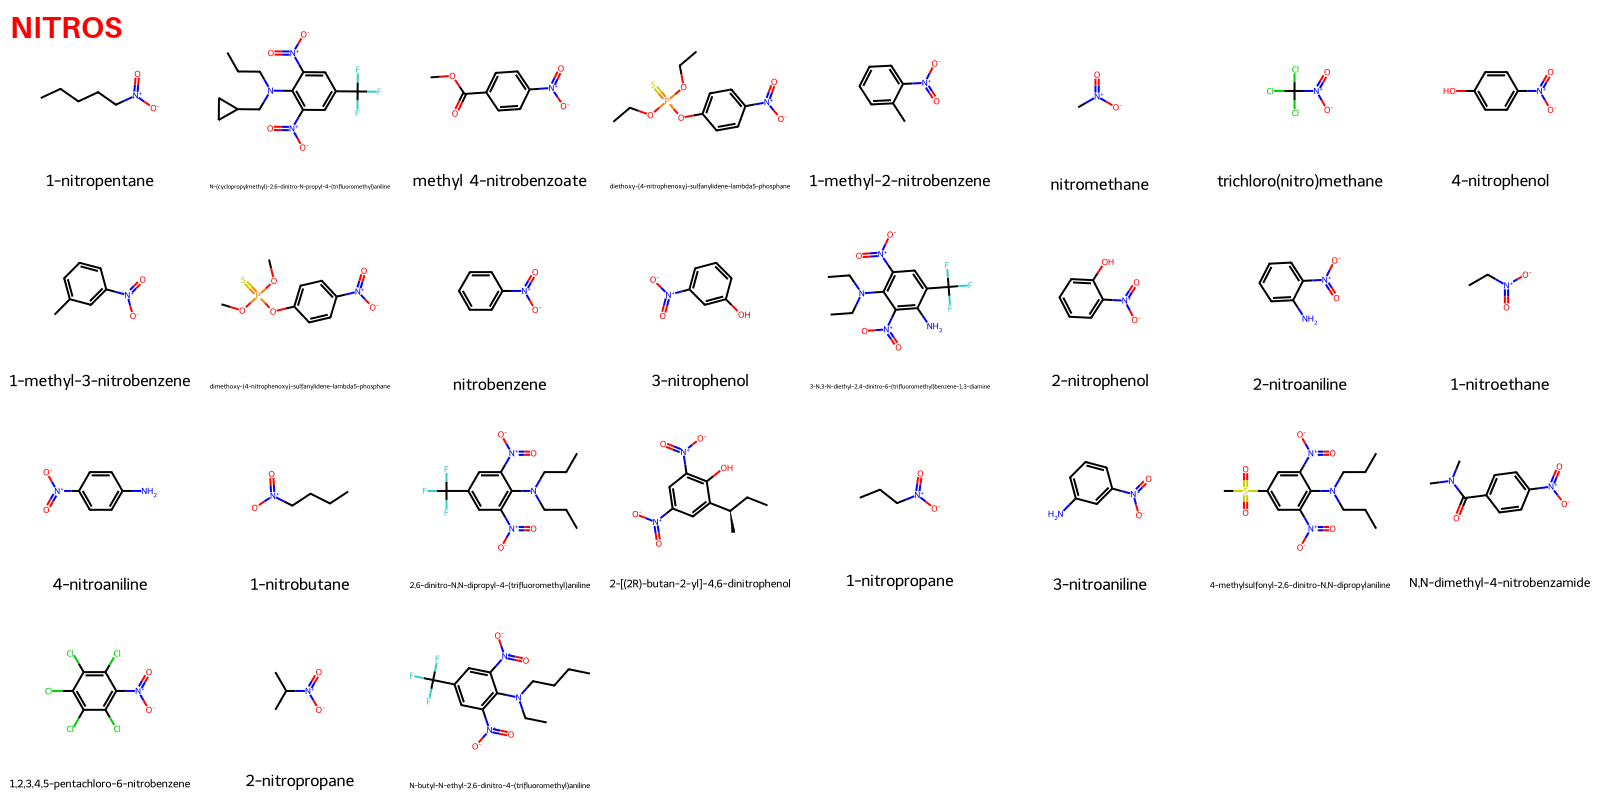

In [ ]:
get_figures('nitros')

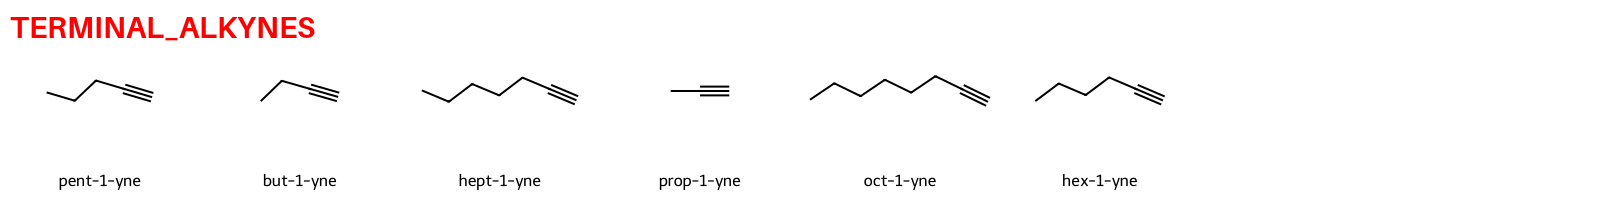

In [ ]:
get_figures('terminal_alkynes')

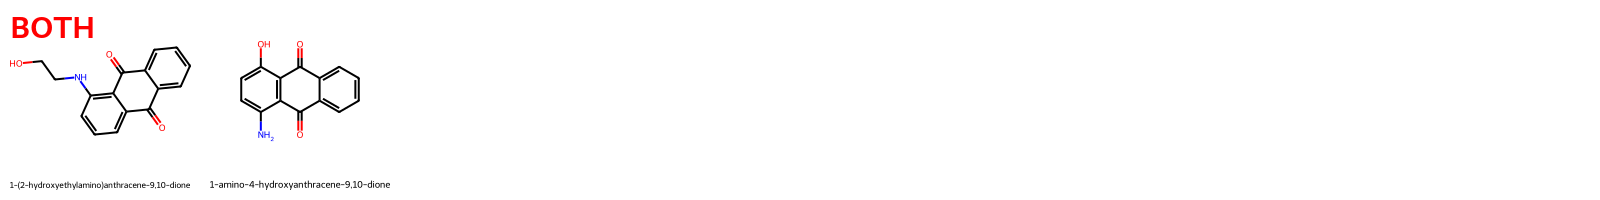

In [ ]:
get_figures('both')

In [20]:
get_figures('other')

BadRequestError: 'PUGREST.BadRequest: error: '

In [ ]:
sfes_df

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [ ]:
sfes_df.to_csv('sfes_experimental_dataset.csv')